### MNIST DATASET
* Set of 70000 images of handwritten digits
* Each images has 784 features
* Each image has 28*28 pixels & each feature simply represent one pixel's
  intensity, from 0 (white) to 255 (black)
* All images are labelled with the respective digit they represent

### 1. Fetching Dataset

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
%time

Wall time: 0 ns


In [19]:
x, y = mnist['data'], mnist['target']

In [20]:
x.shape, y.shape

((70000, 784), (70000,))

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
# looking for a digit
some_digit = x[3600]
some_digit_image = some_digit.reshape(28, 28)  # reshape in 28*28 to plot it

(-0.5, 27.5, 27.5, -0.5)

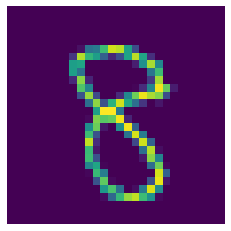

In [23]:
plt.imshow(some_digit_image, interpolation="nearest")
plt.axis("off")

In [24]:
# To verify find same in target set y( should be same as above image)
y[3600]

'8'

In [25]:
y[:70]  # display target digit of first 70 numbers

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
       '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
       '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
       '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
       '5', '6', '1', '0', '0'], dtype=object)

### 2. Splitting Training & Test set

In [26]:
# Training set first 60000 digits & last 10000 for test set
x_train, x_test = x[:60000], x[60000:]

In [27]:
# Split target into training & test set
y_train, y_test = y[:60000], y[60000:]

In [28]:
# shuffle training set
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

### Creating a '2' detector

In [29]:
# 1st 2 lines convert string type of y_train & y_test to int type
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# detect a 2 in dataset
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)
y_train_2

array([False, False, False, ..., False, False, False])

In [30]:
y_train, y_test

(array([6, 1, 9, ..., 8, 4, 1], dtype=int8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int8))

### Classify & evaluating the model for digit = 2 

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(x_train, y_train_2)

C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
clf.predict([some_digit])

array([False])

In [33]:
# Evaluate using the Cross-Validation Score, with scoring="accuracy"
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=5, scoring='accuracy')

C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [34]:
# This model is evaluated
print(a)
a.mean()

[0.9795     0.97616667 0.97958333 0.979      0.97975   ]


0.9788

### 3. Evaluating a Classifier Model
* 1. Accuracy Score (used above- default Matrics)
* 2. Confusion Matrix - Precision, Recall, F1-score

In [37]:
# lets find the predcitions with cross_val_predict with cross validation
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=5)

C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [38]:
y_train_pred

array([False, False, False, ..., False, False, False])

### 4. Calculating Confusion Matrix

In [39]:
# find the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[53581,   461],
       [  811,  5147]], dtype=int64)

In [41]:
# An ideal confusion matrix for perfect predictions
confusion_matrix(y_train_2, y_train_2)

array([[54042,     0],
       [    0,  5958]], dtype=int64)

#### Precision, Recall & F1- score

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
# Precision score
precision_score(y_train_2, y_train_pred)

0.9177960057061341

In [49]:
# Recall score
recall_score(y_train_2, y_train_pred)

0.8638804968110104

In [50]:
# F1 score
f1_score(y_train_2, y_train_pred)

0.890022479681826

In [53]:
# Precision-Recall tradeoff ( Precision-Recall curve)
# if Precision increase - Recall decrease
# if Precision decrease - Recall increase

from sklearn.metrics import precision_recall_curve

In [69]:
# To find the threshold need t find y_scores
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method = "decision_function")
y_scores

C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\viru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

array([-11.95417905,  -6.78275719,  -6.47983832, ..., -13.66228202,
       -10.81011706,  -1.00765851])

In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [71]:
print(precisions)
print(recalls)
print(thresholds)

[0.10068611 0.10067091 0.10067262 ... 1.         1.         1.        ]
[1.00000000e+00 9.99832158e-01 9.99832158e-01 ... 3.35683115e-04
 1.67841558e-04 0.00000000e+00]
[-25.43904478 -25.43048971 -25.42341796 ...  18.99285313  19.0697967
  22.07726114]


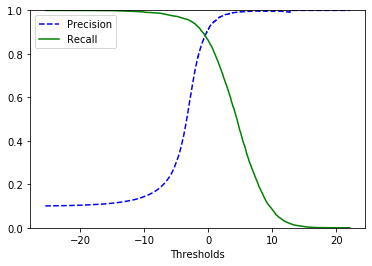

In [73]:
# Precision-Recall curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()